In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #visualization

from sklearn.model_selection  import  train_test_split # to split the dataset for training and validation
from sklearn.metrics import classification_report # to get precesion and recall
from sklearn.linear_model import LogisticRegression # to solve problem statement
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.preprocessing import LabelEncoder 

In [2]:
df=pd.read_csv('C:/Users/USER/Downloads/salarydata.csv')

In [3]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [7]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [8]:
df['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

## removing outlier

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

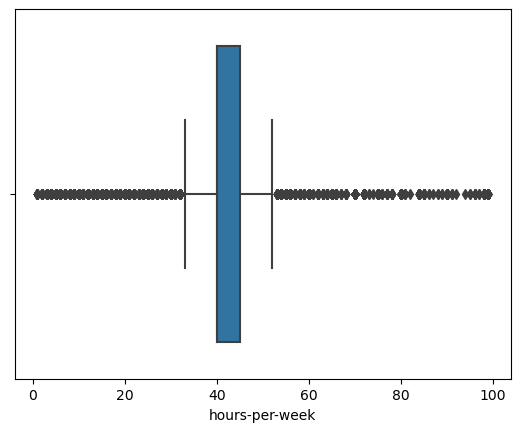

In [9]:
sns.boxplot(df['hours-per-week'])

In [10]:
def remove_outlier_hours_per_week(df):
    IQR=df['hours-per-week'].quantile(0.75)-df['hours-per-week'].quantile(0.25)
    
    lower_range=df['hours-per-week'].quantile(0.25)-(1.5*IQR)
    upper_range=df['hours-per-week'].quantile(0.75)+(1.5*IQR)
    
    df.loc[df['hours-per-week']<=lower_range,'hours-per-week']=lower_range
    df.loc[df['hours-per-week']>=upper_range,'hours-per-week']=upper_range

In [11]:
remove_outlier_hours_per_week(df)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

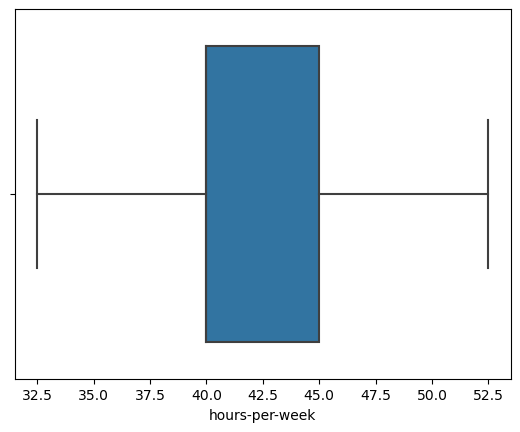

In [12]:
sns.boxplot(df['hours-per-week'])

In [13]:
## removing outliers from education_num

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num'>

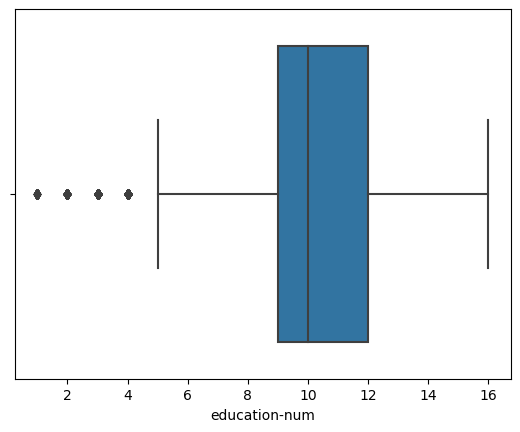

In [14]:
sns.boxplot(df['education-num'])

In [15]:
def remove_outlier_education_num(df):
  
    IQR=df['education-num'].quantile(0.75)-df['education-num'].quantile(0.25)
    
    
    lower_range=df['education-num'].quantile(0.25)-(1.5*IQR)
    upper_range=df['education-num'].quantile(0.75)+(1.5*IQR)
    
    df.loc[df['education-num']<=lower_range,'education-num']=lower_range
    df.loc[df['education-num']>=upper_range,'education-num']=upper_range

In [16]:
remove_outlier_education_num(df)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num'>

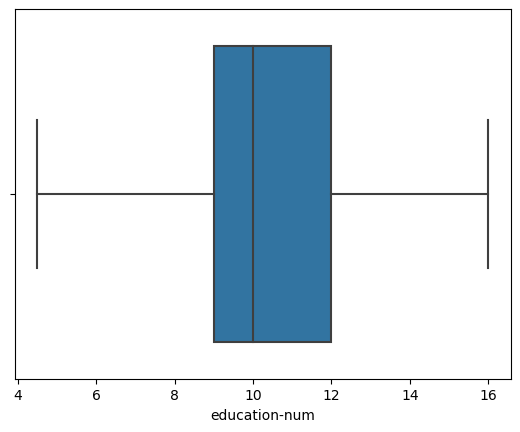

In [17]:
sns.boxplot(df['education-num'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

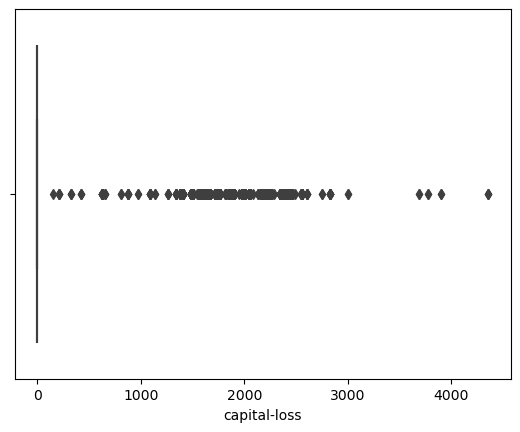

In [18]:
sns.boxplot(df['capital-loss'])

In [19]:
## capital_loss

In [20]:
def remove_outlier_capital_loss(df):
  
    IQR=df['capital-loss'].quantile(0.75)-df['capital-loss'].quantile(0.25)
    
    
    lower_range=df['capital-loss'].quantile(0.25)-(1.5*IQR)
    upper_range=df['capital-loss'].quantile(0.75)+(1.5*IQR)
    
    df.loc[df['capital-loss']<=lower_range,'capital-loss']=lower_range
    df.loc[df['capital-loss']>=upper_range,'capital-loss']=upper_range

In [21]:
remove_outlier_capital_loss(df)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

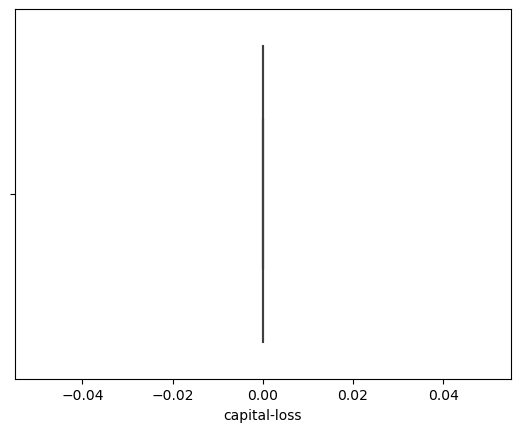

In [22]:
sns.boxplot(df['capital-loss'])

## correlation between attributes

<AxesSubplot:>

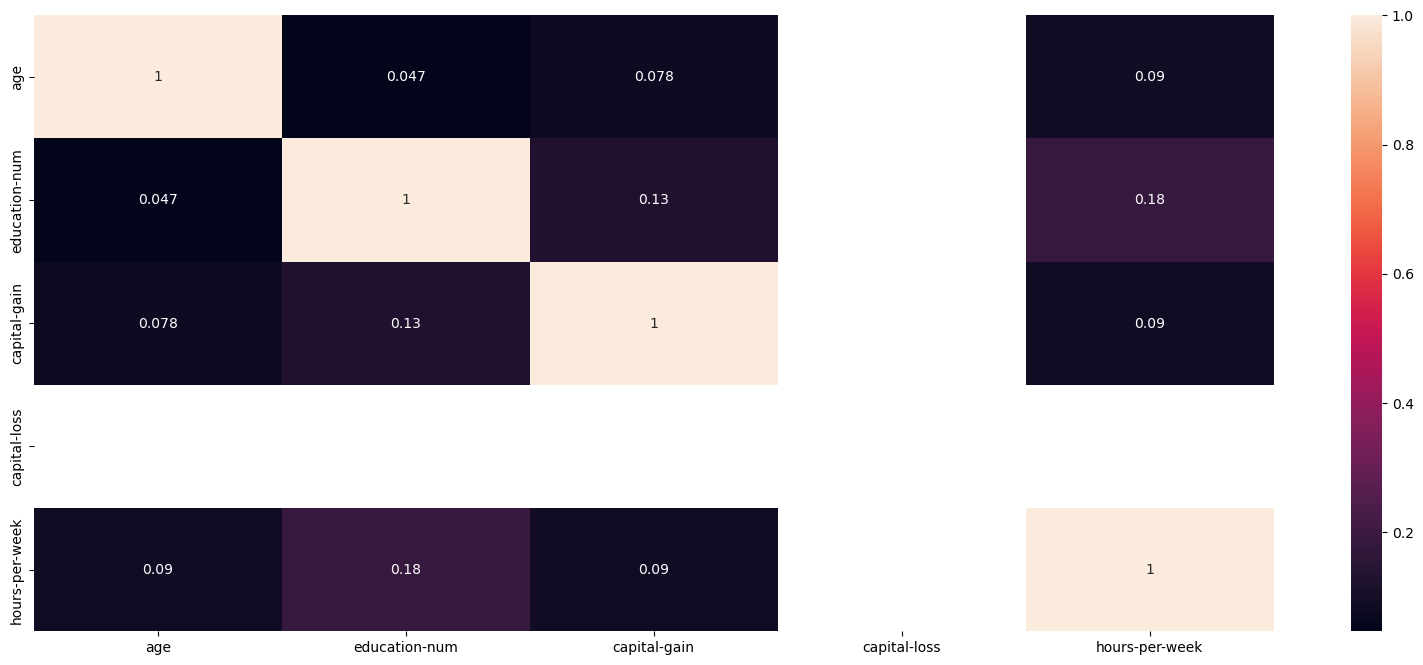

In [23]:
plt.subplots(figsize=(20,8))
corr=df.corr()
sns.heatmap(corr,annot=True)

## feature engineering

In [24]:
# converting string columns to intigers

le=LabelEncoder()
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])   
df['marital-status']=le.fit_transform(df['marital-status'])   
df['occupation']=le.fit_transform(df['occupation'])   
df['relationship']=le.fit_transform(df['relationship'])   
df['race']=le.fit_transform(df['race'])   
df['sex']=le.fit_transform(df['sex'])   
df['native-country']=le.fit_transform(df['native-country'])   

In [25]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,9,13.0,4,1,1,4,1,2174,0,40.0,39,<=50K
1,50,6,9,13.0,2,4,0,4,1,0,0,32.5,39,<=50K
2,38,4,11,9.0,0,6,1,4,1,0,0,40.0,39,<=50K
3,53,4,1,7.0,2,6,0,2,1,0,0,40.0,39,<=50K
4,28,4,9,13.0,2,10,5,2,0,0,0,40.0,5,<=50K


## scaling

In [26]:
sc=StandardScaler()

In [27]:
x=df[['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']]

In [28]:
y=df['salary']

In [29]:
y.value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [30]:
x=sc.fit_transform(x)

## train_test_split

In [31]:
# from the scaled data now lets create the logistic regression model
    
# for that we already imported the necessary libraries


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

lr=LogisticRegression()#creating an instance

In [32]:
model=lr.fit(x_train,y_train)# model creation

In [33]:
y_pred=model.predict(x_test)#y predictions 

In [34]:
# model validation checking 
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [35]:
print(accuracy_score(y_test,y_pred))#accuracy of logistic Regression model

0.8281537894607542


In [36]:
result={
    'Actual':y_test,
    'Predicted':y_pred
}

In [37]:
pd.DataFrame(result)

,Actual,Predicted
14160,<=50K,<=50K
27048,<=50K,<=50K
28868,>50K,<=50K
5667,<=50K,<=50K
7827,<=50K,>50K
...,...,...
26658,<=50K,<=50K
29401,>50K,<=50K
27265,<=50K,<=50K
30339,>50K,>50K


In [41]:
import pickle
# open file where we want to store the data
filename='model.pkl'
pickle.dump(model,open(filename, 'wb'))




In [42]:
load_model=pickle.load(open(filename,'rb'))

In [43]:
load_model.predict([[30,4,9,13.0,2,6,2,2,1,0,0,40,5]])

array(['>50K'], dtype=object)

In [44]:
model = pickle.load(open('model.pkl', 'rb'))
